# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Online Retail.xlsx")


In [3]:
df.sort_values(by=['InvoiceDate'], ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


## Perform data cleaning and augmentation

In [4]:
df.isnull().sum()/df.count()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.269033
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     33.203139
Country         0.000000
dtype: float64

We can see that 33% of orders are ordered by not authorized customers

Let's add the "full price" column to the table for our calculations:

In [29]:
full_unit_price = df['Quantity']*df['UnitPrice']
df['FullUnitPrice'] = full_unit_price
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,FullUnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Exploring statistics

Let's see which month is the most active:

<BarContainer object of 13 artists>

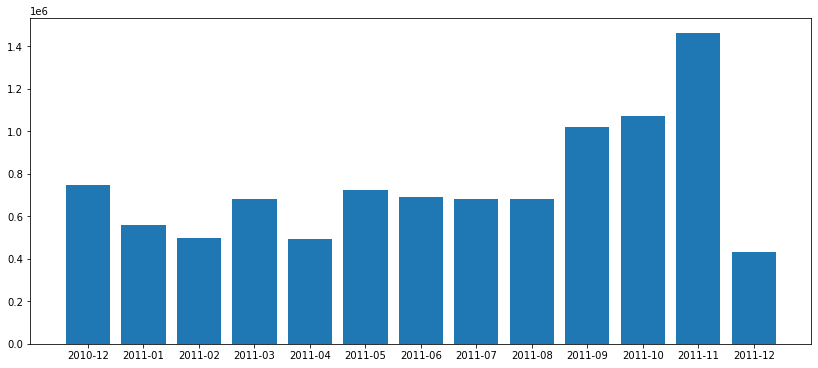

In [20]:
monthed = df.groupby([df.InvoiceDate.dt.strftime("%Y-%m")])['FullUnitPrice'].sum()
plt.figure(figsize=(14,6))
plt.bar(monthed.index, monthed.values)

We can see, that december of 2011 was the most profitable. But it's still not enough to make some conclusion. Let's try to chek profit by days of week:

<BarContainer object of 6 artists>

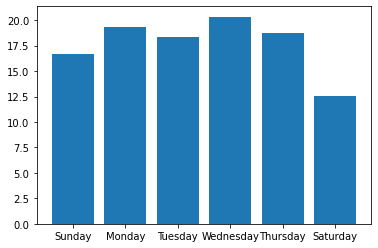

In [21]:
week = df.groupby([df.InvoiceDate.dt.dayofweek])['FullUnitPrice'].mean()
week
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Saturday"]
plt.bar(days, week.values)

In [7]:
friday = df[df.InvoiceDate.dt.dayofweek == 5]
friday.count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

We can see, that most profitable day is wednesday and less profitable day is saturday. The first 4 days of week are not dramatically differ to each other, but saturday has about 30% less activity. There is no orders at friday at all, maybe it's because the shop doesn't work at friday. Or may be data are loss or corrupted.

Let's see which country is the most active:

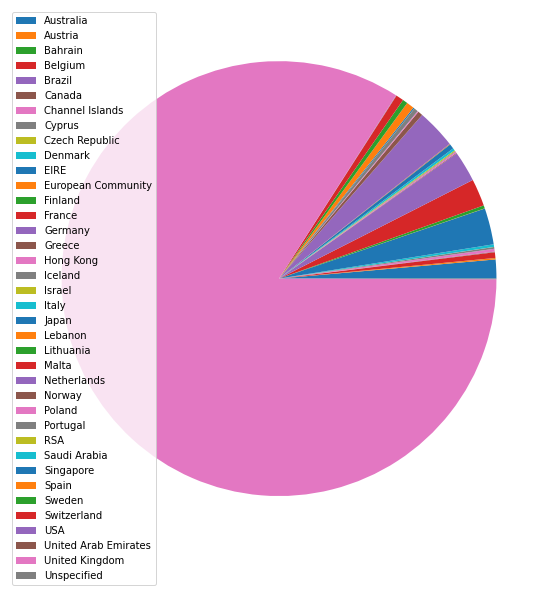

In [22]:
country = df.groupby(['Country'])['FullUnitPrice'].sum()
labels = country.index.array
labels
plt.figure(figsize=(10,10))
p, text = plt.pie(country)
plt.legend(p, labels, loc='best')
plt.show()

The most active country is UK. The second is France, but it's more than 20 times difference between them.
Let's see which products are most popular:

In [26]:
products = df.groupby(["StockCode", "Description"])["Quantity"].sum().sort_values(ascending=False)
products.head(10)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
85099B     JUMBO BAG RED RETROSPOT               47363
84879      ASSORTED COLOUR BIRD ORNAMENT         36381
22197      POPCORN HOLDER                        36334
21212      PACK OF 72 RETROSPOT CAKE CASES       36039
85123A     WHITE HANGING HEART T-LIGHT HOLDER    35025
23084      RABBIT NIGHT LIGHT                    30680
22492      MINI PAINT SET VINTAGE                26437
22616      PACK OF 12 LONDON TISSUES             26315
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

You can see top 10 most-selling products above, ordered by their quantity. Now let's see which products buyers paid the most money for:

In [27]:
products = df.groupby(["StockCode", "Description"])["FullUnitPrice"].sum().sort_values(ascending=False)
products.head(10)

StockCode  Description                       
DOT        DOTCOM POSTAGE                        206245.48
22423      REGENCY CAKESTAND 3 TIER              164762.19
47566      PARTY BUNTING                          98302.98
85123A     WHITE HANGING HEART T-LIGHT HOLDER     97715.99
85099B     JUMBO BAG RED RETROSPOT                92356.03
23084      RABBIT NIGHT LIGHT                     66756.59
POST       POSTAGE                                66230.64
22086      PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
84879      ASSORTED COLOUR BIRD ORNAMENT          58959.73
79321      CHILLI LIGHTS                          53768.06
Name: FullUnitPrice, dtype: float64

And this positions brought the most losses to the site:

In [28]:
products = df.groupby(["StockCode", "Description"])["FullUnitPrice"].sum().sort_values(ascending=False)
products.tail(10)

StockCode     Description                   
35400         WOODEN BOX ADVENT CALENDAR           -45.700
85063         CREAM SWEETHEART MAGAZINE RACK       -46.850
79323W        WHITE CHERRY LIGHTS                  -54.000
S             SAMPLES                            -3049.390
D             Discount                           -5696.220
BANK CHARGES  Bank Charges                       -7175.639
CRUK          CRUK Commission                    -7933.430
B             Adjust bad debt                   -11062.060
M             Manual                            -68674.190
AMAZONFEE     AMAZON FEE                       -221520.500
Name: FullUnitPrice, dtype: float64

We can see that most losses causes by amazon fees and other comissions.

## Conslusion

During the project I've explored the given seller's data. One year and one moth period is not very informative, but I still can get some valuable insights. For example, we can see that saturday has much less activity in compare with other days of week, and UK is the most "buying" country on this marketplace.

But it's still some anomalies. First of all, there are completely no data about orders created on friday. I don't think it's because the marketplace doesn't work on friday, it obviously very strange. So I think data is corrupted somehow. Obviously, we've lost about 14% of overall statistical data. It can't dramatically change our conclusions about countries and most selling products, however, it can seriosly damage day-of-week and even month selling statistics. 
